<h1 style='color:blue;text-align:center'>Capstone Project: Salaries and Wages Prediction
    </h1>
<h3 style='color:green;text-align:center'><b>Ella Huang</b><h3>
<p style='color:green;text-align:center'>28th/May/2020</p>
<hr />

**This file consists of four parts below aimed to walk you through the journey to predict salaries and wages against a specified occupation.**
<ol style='font-size:150%'>
    <li><b><a href='#c1'>Introduction</a></b></li>
    <li><b><a href='#c2'>Methodology</a></b></li>
    <li><b><a href='#c3'>Results and Discussion</a></b></li>
    <li><b><a href='#c4'>Conclusion</a></b></li>
</ol>        
<hr>

<h2 id='c1'> 1. Introduction </h2>
<br >
<p><b>At this part, we shed light on describing the problem and data to be analyzed.The example occupation is Human Resources Manager with based in New York City and it's a full-time job. </b></p>
<p><b>Problems:</b> As an employer, how much should I pay for a specified occupation? and how do I know what I pay is reasonable or even competitive in the labor market?</p>
<p><b>Background:</b>Jay is an employer who has the business size around  500 employees, his business focuses on semiconductor and electronic product manufacturing, his factories locate in the non-metro area, however, he would like to establish an office in New York City as the business grows. As an employer, Jay has two concerns about the recruitment of Human Resources Manager(HRM), 1. Labor cost 2.Competitive salaries and wages. Therefore , he'd like to know how much he should pay for this occupation , which is reasonable and maybe competitive in the labor market.</p>
<p><b>Data:</b> Data is the foundation and the key to explore our questions, so its reliability is the priority, because reliability determines validity.The source of our data is from Occupational Employment Statistics Survey from US Bureau of Labor Statistics, and the website: www.bls.gov/oes for reference</p>
<hr >

<h2 id='c2'> 2.Methodology</h2>
**This part, we focus on 1. The tools to be used for data analysis and data visualization in Python. 2. The Data Science methods to be applied. Please be noted that in view of the specific case we will look into, machine learning techniques won't be applied, including algorithms like Classification(LinearRegression,Ridge,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,Support Vector Machine etc) or Clusters(like AgglomerativeClustering,DBCAN,KMeans etc). Foursquare API is not applicable for this case either.**
<p><b>Tools for Data Analysis:</b>Numpy, Pandas</p>
<p><b>Tools for Data Visualization:</b>Matplotlib</p>
<p><b>Data Science Methods:</b>
<ol type='a'>
    <li>Wrangling Data</li>
    <li>Exploring Data</li>
    <li>Model Development</li>
    <li>Model Evaluation and Refinement</li>
    </ol>
</p>

<p>First of all, we import the tools that we need, then we read the datasets into pandas dataframe and check the relevant information around the dataframe</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



<p>Let's check how many worksheets in the workbook and what they are.</p>

In [3]:
xl=pd.ExcelFile('Occupational Employment Stats.xlsx')
xl.sheet_names

['All May 2019 Data', 'Field Descriptions']

<p>We can see two sheets and their names displayed as well. Now we open Field Descriptions to look at the description and understand the features of the datasets. And we also set the column width considering the length of texts maybe long.</p>

In [4]:
pd.set_option('max_colwidth',None)
xl.parse('Field Descriptions')

,May 2019 OES Estimates,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Occupational Employment Statistics (OES) Survey,NaN,NaN
2,"Bureau of Labor Statistics, Department of Labor",NaN,NaN
3,website: www.bls.gov/oes,NaN,NaN
4,email: oesinfo@bls.gov,NaN,NaN
5,NaN,NaN,NaN
6,Not all fields are available for every type of estimate,NaN,NaN
7,NaN,NaN,NaN
8,Field,Field Description,NaN
9,area,"U.S. (99), state FIPS code, Metropolitan Statistical Area (MSA) or New England City and Town Area (NECTA) code, or OES-specific nonmetropolitan area code",NaN


<p>Read data into pandas dataframe.Check the number of rows and columns and data types </p>

In [5]:
occ=xl.parse('All May 2019 Data')
print(occ.shape)
occ[0:3]

(395647, 30)


,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,99,U.S.,1,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,50.8,74.16,#,49990,71460,105660,154260,#,NaN,NaN
1,99,U.S.,1,000000,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,major,...,33.57,45.61,60.6,39020,52130,69820,94870,126040,NaN,NaN
2,99,U.S.,1,000000,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,major,...,42.47,57.47,73.08,45320,62850,88340,119550,152010,NaN,NaN


There are 395,647 rows and 30 columns and we need to look 

In [6]:
occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            395647 non-null  int64  
 1   area_title      395647 non-null  object 
 2   area_type       395647 non-null  int64  
 3   naics           395647 non-null  object 
 4   naics_title     395647 non-null  object 
 5   i_group         395647 non-null  object 
 6   own_code        395647 non-null  int64  
 7   occ_code        395647 non-null  object 
 8   occ_title       395647 non-null  object 
 9   o_group         395647 non-null  object 
 10  tot_emp         395647 non-null  object 
 11  emp_prse        395647 non-null  object 
 12  jobs_1000_orig  225176 non-null  object 
 13  loc_quotient    207966 non-null  float64
 14  pct_total       165003 non-null  object 
 15  h_mean          395647 non-null  object 
 16  a_mean          395647 non-null  object 
 17  mean_prse 

<p>Through the observation, we find that from column 10 to column 27 except column 13, the data type is not what we want,so we need to convert them into float or int.</p>
<h3>2.1 Wrangling Data</h3>

In [7]:
occ.iloc[:,11]=occ.iloc[:,11].replace('**',0)
occ.iloc[:,11]=occ.iloc[:,11].astype(float).round(2)

In [8]:
occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))]=occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))].replace('**',0)
occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))]=occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))].replace('*',0)
occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))]=occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))].replace('#',0)
occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))]=occ.iloc[:,[12]+list(range(14,16))+[17]+list(range(18,23))].astype(float).round(2)

In [9]:
occ.iloc[:,[10]+[16]+list(range(23,28))]=occ.iloc[:,[10]+[16]+list(range(23,28))].replace('**',0)
occ.iloc[:,[10]+[16]+list(range(23,28))]=occ.iloc[:,[10]+[16]+list(range(23,28))].replace('*',0)
occ.iloc[:,[10]+[16]+list(range(23,28))]=occ.iloc[:,[10]+[16]+list(range(23,28))].replace('#',0)
occ.iloc[:,[10]+[16]+list(range(23,28))]=occ.iloc[:,[10]+[16]+list(range(23,28))].astype(int)

</p>Check the data information again to see if the conversion we want is done before exploration. </p>

In [10]:
occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            395647 non-null  int64  
 1   area_title      395647 non-null  object 
 2   area_type       395647 non-null  int64  
 3   naics           395647 non-null  object 
 4   naics_title     395647 non-null  object 
 5   i_group         395647 non-null  object 
 6   own_code        395647 non-null  int64  
 7   occ_code        395647 non-null  object 
 8   occ_title       395647 non-null  object 
 9   o_group         395647 non-null  object 
 10  tot_emp         395647 non-null  int64  
 11  emp_prse        395647 non-null  float64
 12  jobs_1000_orig  225176 non-null  float64
 13  loc_quotient    207966 non-null  float64
 14  pct_total       165003 non-null  float64
 15  h_mean          395647 non-null  float64
 16  a_mean          395647 non-null  int64  
 17  mean_prse 

<h3>2.2 Exploring Data</h3>
<p>In view of the specified occupation (HRM) is general and the industry requirement is not so significant. The features we pick up focus on : area_title,occ_title,tot_emp,emp_prse and datasets associated with average hourly wages and average annually wages.</p>

In [11]:
occ=occ.iloc[:,[1]+[8]+list(range(10,12))+list(range(15,28))]
occ.head()

,area_title,occ_title,tot_emp,emp_prse,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
0,U.S.,Management Occupations,8054120,0.2,58.88,122480,0.1,24.03,34.35,50.80,74.16,0.00,49990,71460,105660,154260,0
1,U.S.,Business and Financial Operations Occupations,8183750,0.2,37.56,78130,0.2,18.76,25.06,33.57,45.61,60.60,39020,52130,69820,94870,126040
2,U.S.,Computer and Mathematical Occupations,4552880,0.4,45.08,93760,0.5,21.79,30.22,42.47,57.47,73.08,45320,62850,88340,119550,152010
3,U.S.,Architecture and Engineering Occupations,2592680,0.5,42.69,88800,0.3,21.77,29.28,39.15,52.87,68.56,45280,60910,81440,109970,142610
4,U.S.,"Life, Physical, and Social Science Occupations",1288920,0.7,37.28,77540,0.4,17.62,23.73,32.77,46.24,61.59,36640,49360,68160,96180,128100


<p>Now at this stage, it's a moment to think about the job analysis and job description of HRM, as this requires the viewer to own the background knowledge and experience on recruitment. so we skip the process of job analysis and job description. But we'd like to emphasize that we conclude the skills required and job duties performed to weigh the job roles (s)he would play: Administration 10% , Compensation and Benefits 20%, Human Resource General 50%, Training and Development 20%</p>
<p>Combined with the location information: New York-Newark-Jersey City,we filter four series:
<ul>
    <li>ASM(Administrative Service Managers)</li>
    <li>CBM(Compensation and Benefits Managers)</li>
    <li>HRM(Human Resources Managers)</li>
    <li>TDM(Training and Development Managers)</li>
    </ul>
</p>

In [12]:
k=['Administrative Services and Facilities Managers','Compensation and Benefits Managers',
   'Human Resources Managers','Training and Development Managers']
ASM=occ.loc[occ['occ_title']==k[0],occ.columns[[0]+list(range(2,occ.shape[1]))]]
ASM=ASM.groupby('area_title').mean().round(2)
ASM=ASM.loc['New York-Newark-Jersey City, NY-NJ-PA']
ASM

tot_emp       25070.00
emp_prse          1.80
h_mean           67.69
a_mean       140800.00
mean_prse         0.90
h_pct10          37.09
h_pct25          48.35
h_median         61.67
h_pct75          79.07
h_pct90           0.00
a_pct10       77150.00
a_pct25      100570.00
a_median     128270.00
a_pct75      164460.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [13]:
CBM=occ.loc[occ['occ_title']==k[1],occ.columns[[0]+list(range(2,occ.shape[1]))]]
CBM=CBM.groupby('area_title').mean().round(2)
CBM=CBM.loc['New York-Newark-Jersey City, NY-NJ-PA']
CBM

tot_emp        1650.00
emp_prse          4.10
h_mean           87.39
a_mean       181770.00
mean_prse         2.80
h_pct10          52.10
h_pct25          63.61
h_median         78.74
h_pct75           0.00
h_pct90           0.00
a_pct10      108370.00
a_pct25      132320.00
a_median     163780.00
a_pct75           0.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [14]:
HRM=occ.loc[occ['occ_title']==k[2],occ.columns[[0]+list(range(2,occ.shape[1]))]]
HRM=HRM.groupby('area_title').mean().round(2)
HRM=HRM.loc['New York-Newark-Jersey City, NY-NJ-PA']
HRM

tot_emp       12020.00
emp_prse          2.40
h_mean           81.77
a_mean       170070.00
mean_prse         3.60
h_pct10          42.31
h_pct25          54.26
h_median         73.87
h_pct75          98.99
h_pct90           0.00
a_pct10       88000.00
a_pct25      112870.00
a_median     153650.00
a_pct75      205900.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [15]:
TDM=occ.loc[occ['occ_title']==k[3],occ.columns[[0]+list(range(2,occ.shape[1]))]]
TDM=TDM.groupby('area_title').mean().round(2)
TDM=TDM.loc['New York-Newark-Jersey City, NY-NJ-PA']
TDM

tot_emp        3230.00
emp_prse          3.60
h_mean           80.70
a_mean       167850.00
mean_prse         1.20
h_pct10          46.48
h_pct25          60.46
h_median         75.98
h_pct75          94.95
h_pct90           0.00
a_pct10       96690.00
a_pct25      125750.00
a_median     158050.00
a_pct75      197500.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

<h3>2.3 Model Development</h3>
<p>Then,it's time to concatenate the four series (ASM,CBM,HRM,TDM),and give it a name Merged, as we mentioned the weights each role should take, so we create a list named Weighted to store the weights.</p>
<p>Next, we create a column named Budgets to store the output of the model.</p>
<p>Our model is the sum of the each feature multiplied by its weights </p>

In [16]:
m=[ASM,CBM,HRM,TDM]
Merged=pd.concat(m,axis=1)
Merged.columns=k
Merged['Budgets']=np.zeros(Merged.shape[0])
Weighted=[0.1,0.2,0.5,0.2]
a=[]
for x1,x2,x3,x4 in zip(Merged.iloc[:,0],Merged.iloc[:,1],Merged.iloc[:,2],Merged.iloc[:,3]):
    y=x1*Weighted[0]+x2*Weighted[1]+x3*Weighted[2]+x4*Weighted[3]
    a.append(y)
Merged['Budgets']=a
Merged

,Administrative Services and Facilities Managers,Compensation and Benefits Managers,Human Resources Managers,Training and Development Managers,Budgets
tot_emp,25070.00,1650.00,12020.00,3230.00,9493.000
emp_prse,1.80,4.10,2.40,3.60,2.920
h_mean,67.69,87.39,81.77,80.70,81.272
a_mean,140800.00,181770.00,170070.00,167850.00,169039.000
mean_prse,0.90,2.80,3.60,1.20,2.690
h_pct10,37.09,52.10,42.31,46.48,44.580
h_pct25,48.35,63.61,54.26,60.46,56.779
h_median,61.67,78.74,73.87,75.98,74.046
h_pct75,79.07,0.00,98.99,94.95,76.392
h_pct90,0.00,0.00,0.00,0.00,0.000


<h3>2.4 Model Evaluation and Refinement</h3>
<p>Due to the model we build is to predict the salaries and wages for a specified occupation, and it's customized by cases , so we don't have uniformed data to evaluate and refine the model because the characteristics of each candidate is distinctive and unique. Therefore , this essential step is skipped for the model.</p>
<hr >

<h2 id='c3'>3. Results and Discussion</h2>
<p>Now we can refer to the budgets for HRM, the mean of the hourly wage and the annual wage is <b>81.27 US dollars</b> and <b>169,039 US dollars </b>respectively, the median of the hourly wage and the annual wage is <b>74.046 US dollars </b>and <b>154,018 US dollars </b>respectively, also we can refer to the percentile of<b> 10th, 25th, 50th, 75th </b>when an employer considers how much reasonably should be paid. However, we can see the 90th is 0 ,which means that's no data available to predict it. Besides salaries and wages prediction, benefits we should also take into account when design the remuneration packages, benefits mainly covers: Insurance, holidays, vacations, retirement plan and savings, leave plans, and legally required benefits.  As for insurance , especially health insurance which mainly include medical care, vision care, dental care, outpatient prescription drugs. In a word, we should keep an eye on the various factors that affect compensation and benefits, take care of the balance between the labor costs and remuneration packages.</p>

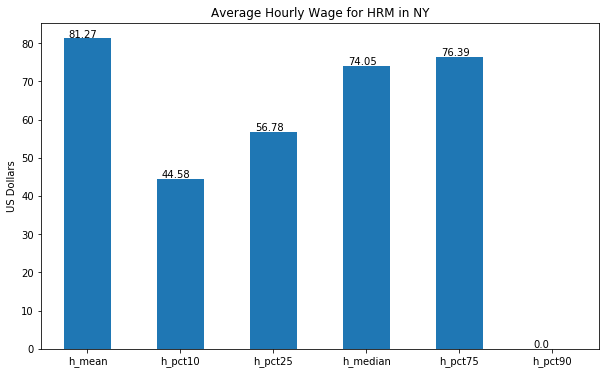

In [17]:
AHW=Merged.iloc[[2]+list(range(5,10)),4].round(2)
AHW.plot(kind='bar',figsize=(10,6))
plt.title('Average Hourly Wage for HRM in NY')
plt.ylabel('US Dollars')
plt.xticks(rotation=0)
for i,v in enumerate(AHW):
    plt.annotate(v,xy=[(i-0.2),(v+0.3)])
plt.show()

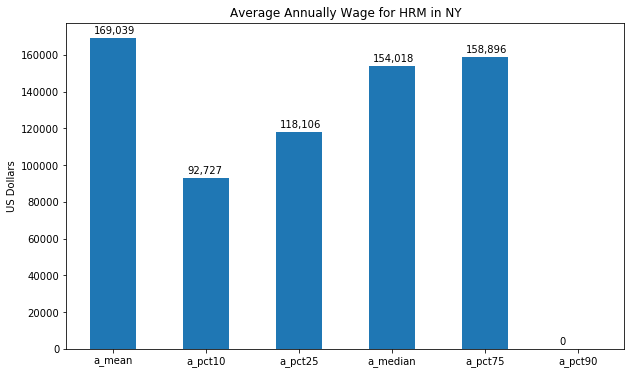

In [18]:
AAW=Merged.iloc[[3]+list(range(10,15)),4].astype(int)
AAW.plot(kind='bar',figsize=(10,6))
plt.title('Average Annually Wage for HRM in NY')
plt.ylabel('US Dollars')
plt.xticks(rotation=0)
for i,v in enumerate(AAW):
    plt.annotate('{:,}'.format(v),xy=[(i-0.2),(v+2500)])
plt.show()

<hr >

<h2 id='c4'>4.Conclusion</h2>
<p>From the data analysis above and the diagram shows, we can conclude the points below for reference:
<ul><li>The estimated average hourly wage for HRM in New York-Newark-Jersey City, USA is <b>USD 81.27</b> and the median is <b>USD 74.05</b></li>
<li>The estimated average annually wage for HRM in New York-Newark-Jersey City, USA is <b>USD 169,039 </b>and the median is <b>USD 154,018.</b></li>
    </ul></p>
<p>Besides,please be noted that we don't take CPI (Consumer Price Index) into account. </p>
<p>Hope you enjoy this example and learn a bit of how to predict salaries and wages for a specified occupation.</p>